In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.model_selection import cross_val_score, KFold
import xgboost as xgb

# TRAIN

In [2]:
for i in range(8):
    if i==0:
        train = pd.read_csv('salida/resultados/RTE3/DEV_'+str(i+1)+'.csv.csv')
    else:
        temp = pd.read_csv('salida/resultados/RTE3/DEV_'+str(i+1)+'.csv.csv')
        train=pd.concat([train,temp])

In [3]:
train

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,sim_faltantes,CLASS
0,0.000000,0.00000,0.000,0.000000e+00,0.000000,0.000000,0,0,1.000000,YES
1,0.000000,115.24142,0.000,7.130074e-12,40.431974,0.000000,0,5,0.000000,NO
2,0.000000,0.00000,0.000,0.000000e+00,0.000000,0.000000,0,2,1.000000,UNKNOWN
3,0.000000,0.00000,0.000,0.000000e+00,0.000000,0.000000,0,0,1.000000,YES
4,0.538812,142.35385,1.530,1.667491e+01,5.765878,0.231184,0,0,0.037146,YES
...,...,...,...,...,...,...,...,...,...,...
95,2.227070,80.40987,2.055,2.127697e+01,4.710831,0.424818,0,0,0.258356,UNKNOWN
96,0.000000,0.00000,0.000,0.000000e+00,0.000000,0.000000,0,0,1.000000,YES
97,0.000000,0.00000,0.000,0.000000e+00,0.000000,0.000000,0,0,1.000000,UNKNOWN
98,0.000000,0.00000,0.000,0.000000e+00,0.000000,0.000000,0,0,1.000000,NO


<Axes: title={'center': 'relaciones'}, xlabel='CLASS'>

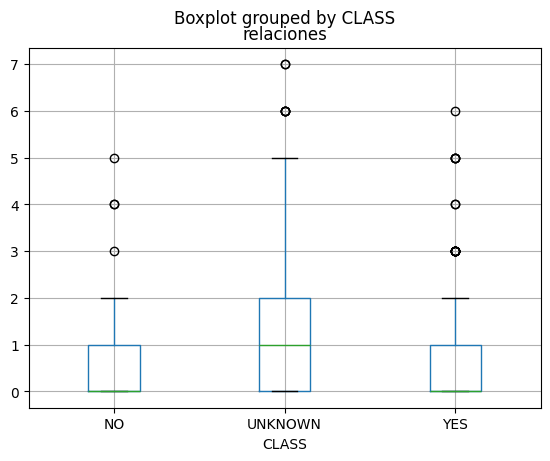

In [4]:
train.boxplot(by="CLASS",column=["relaciones"])

<Axes: title={'center': 'sim_faltantes'}, xlabel='CLASS'>

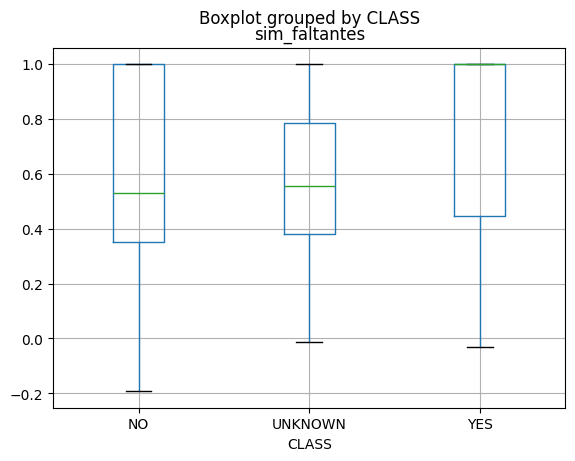

In [5]:
train.boxplot(by="CLASS",column=["sim_faltantes"])

In [6]:
train=train.drop(["entropias","antonimos"],axis=1)
train

,suma,distancias,mutual_info,m_earth,max_info_p,relaciones,sim_faltantes,CLASS
0,0.000000,0.00000,0.000000e+00,0.000000,0.000000,0,1.000000,YES
1,0.000000,115.24142,7.130074e-12,40.431974,0.000000,5,0.000000,NO
2,0.000000,0.00000,0.000000e+00,0.000000,0.000000,2,1.000000,UNKNOWN
3,0.000000,0.00000,0.000000e+00,0.000000,0.000000,0,1.000000,YES
4,0.538812,142.35385,1.667491e+01,5.765878,0.231184,0,0.037146,YES
...,...,...,...,...,...,...,...,...
95,2.227070,80.40987,2.127697e+01,4.710831,0.424818,0,0.258356,UNKNOWN
96,0.000000,0.00000,0.000000e+00,0.000000,0.000000,0,1.000000,YES
97,0.000000,0.00000,0.000000e+00,0.000000,0.000000,0,1.000000,UNKNOWN
98,0.000000,0.00000,0.000000e+00,0.000000,0.000000,0,1.000000,NO


In [7]:
X = np.array(train.drop(['CLASS'],axis=1))
y_ = np.array(train['CLASS'])

In [8]:
# RTE3
y_train=[]
for i in y_:
    if i == "YES":
        y_train.append(1)
    else:
        y_train.append(0)

In [9]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled

In [10]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=7)
X_train=X

# TEST

In [11]:
for i in range(8):
    if i==0:
        test = pd.read_csv('salida/resultados/GHS/GHS_'+str(i+1)+'.csv.csv')
    else:
        temp = pd.read_csv('salida/resultados/GHS/GHS_'+str(i+1)+'.csv.csv')
        test=pd.concat([test,temp])

In [12]:
test=test.drop(["entropias","antonimos"],axis=1)
test

,suma,distancias,mutual_info,m_earth,max_info_p,relaciones,sim_faltantes,CLASS
0,5.679739,79.98151,26.125275,4.323032,1.000000,1,0.661373,ENTAILMENT
1,25.331194,1055.37120,153.406431,24.355206,0.389737,4,0.742481,NONENTAILMENT
2,16.384842,845.79240,183.542110,37.086826,0.336778,3,0.474353,NONENTAILMENT
3,0.000000,0.00000,0.000000,0.000000,0.000000,0,1.000000,ENTAILMENT
4,12.049216,1389.58010,131.118867,77.395240,0.294243,4,0.474036,NONENTAILMENT
...,...,...,...,...,...,...,...,...
95,41.176525,2078.99200,383.745933,91.014366,0.363880,0,0.515552,NONENTAILMENT
96,8.346832,164.74274,63.822208,22.211134,0.415687,1,0.461147,ENTAILMENT
97,27.009216,2074.65770,373.729796,83.578557,0.368339,3,0.591632,NONENTAILMENT
98,17.902107,689.81537,163.529527,29.076957,0.454881,5,0.646072,NONENTAILMENT


In [13]:
test.describe()

,suma,distancias,mutual_info,m_earth,max_info_p,relaciones,sim_faltantes
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,10.782132,589.255997,105.337810,28.207232,0.327566,2.118750,0.542076
std,12.019709,611.292949,111.449160,31.994122,0.165812,2.091678,0.254166
min,-1.068840,0.000000,0.000000,0.000000,0.000000,0.000000,-0.219168
25%,2.119242,115.306331,24.464317,5.141072,0.266570,0.000000,0.370588
50%,6.482136,331.830390,64.519104,16.913487,0.361887,2.000000,0.537461
75%,16.053702,938.190000,158.395787,40.429623,0.434563,3.000000,0.673692
max,70.830160,3218.455000,708.410772,235.013540,1.000000,13.000000,1.000000


In [14]:
X_t = np.array(test.drop(['CLASS'],axis=1))
y_t = np.array(test['CLASS'])

In [15]:
# RTE3
y_test=[]
for i in y_t:
    if i == "ENTAILMENT":
        y_test.append(1)
    else:
        y_test.append(0)

In [16]:
scaler = preprocessing.StandardScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO

In [17]:
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)

In [18]:
clf_xgb = xgb.XGBClassifier(objective='reg:logistic',n_estimators=3000,device="cuda")
clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=3000, n_jobs=None,
              num_parallel_tree=None, objective='reg:logistic', ...)

In [19]:
preds_xgb = clf_xgb.predict(X_test)

/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [12:52:41] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


In [20]:
print("acccuracy: ",round(accuracy_score(y_test,preds_xgb),2))
print("precision: ",round(precision_score(y_test,preds_xgb),2))
print("recall",round(recall_score(y_test,preds_xgb),2))
print("f1_score: ",round(f1_score(y_test,preds_xgb),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,preds_xgb),2))

acccuracy:  0.8
precision:  0.81
recall 0.79
f1_score:  0.8
matthews_score:  0.6


In [21]:
clf_lr = LR().fit(X_train, y_train)

In [22]:
accuracy_xgb = float(np.sum(preds_xgb == np.array(y_test)))/len(np.array(y_test))
print('Accuracy de XGBoost: ', accuracy_xgb)
accuracy_lr = clf_lr.score(X_test, y_test)
print('Accuracy de Logistic Regression: ', accuracy_lr)

Accuracy de XGBoost:  0.80125
Accuracy de Logistic Regression:  0.8975


In [23]:
confusion_matrix(y_test, preds_xgb)

array([[326,  75],
       [ 84, 315]])

In [24]:
scores = cross_val_score(clf_xgb, X_train, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.63


In [25]:
kfold = KFold(n_splits=20, shuffle=True)
kf_cv_scores = cross_val_score(clf_xgb, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.63
